## Objectives of the project
The 'FinTech' company launched its android and iOS mobile-based apps. But the problem is they want to recommend their app and grow their business. So they decided to give a free trial of the premium version of this app to each and every customer for 24 hours and collect the data from the customers. In this scenario, some customers buy the premium versions, someone not. According to data, the company decided to give special offers who were not interested buy without offers and growing the business.

According to the collection of data, I am trying to predict the customer who actually buys this product and who really does not by using the Machine learning Approach.

It is Classification Problem.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/App behaviorl analysis/FineTech_appData.csv")

In [3]:
df.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
 for i in [0,1,2,3]:
  print(df.loc[i,'screen_list'],'\n')

idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 



In [5]:
df.shape

(50000, 12)

In [6]:
df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [8]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
for i in df.columns:
  print("The unique value of {} are: {} and the lengh of this columns: {}\n____________".format(i, df[i].unique(),len(df[i].unique())))

The unique value of user are: [235136 333588 254414 ... 302367 324905  27047] and the lengh of this columns: 49874
____________
The unique value of first_open are: ['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638'] and the lengh of this columns: 49747
____________
The unique value of dayofweek are: [3 6 1 4 2 0 5] and the lengh of this columns: 7
____________
The unique value of hour are: [' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00'] and the lengh of this columns: 24
____________
The unique value of age are: [ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42 

In [10]:
 df.hour.unique()

array([' 02:00:00', ' 01:00:00', ' 19:00:00', ' 16:00:00', ' 18:00:00',
       ' 09:00:00', ' 03:00:00', ' 14:00:00', ' 04:00:00', ' 11:00:00',
       ' 06:00:00', ' 21:00:00', ' 05:00:00', ' 17:00:00', ' 20:00:00',
       ' 00:00:00', ' 22:00:00', ' 10:00:00', ' 08:00:00', ' 15:00:00',
       ' 13:00:00', ' 23:00:00', ' 12:00:00', ' 07:00:00'], dtype=object)

In [11]:
df["hour"] = df["hour"].str.slice(1,3).astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int64 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.6+ MB


In [13]:
 df2 = df.drop(["user","first_open","screen_list","enrolled_date"], axis=1)

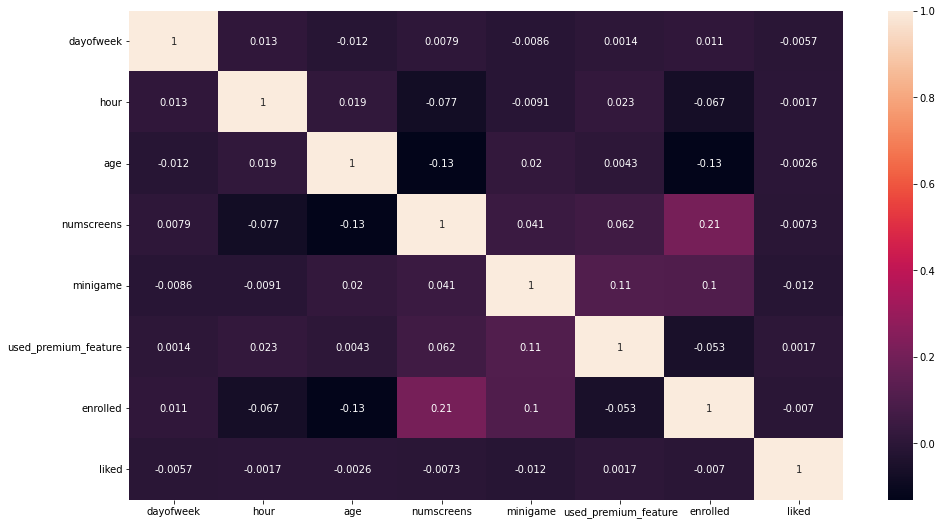

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(), annot=True)

From this heatmap, numscreen and enrolled feature are comparatively high correlated than others that means the people who visit more number of screen , they enrolled more. Then, minigame, used_premium/-feature and enrolled are slightly correlated with each other. In the other hand, numscreen, age and enrolled are slighly negative correlated with others that means, older people less use numscreen and less enrolled.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


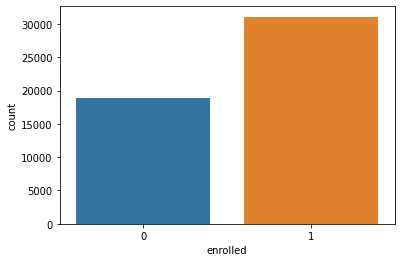

In [15]:
sns.countplot(df2["enrolled"])

**Now we find how much people enrolled on this app of premium version and how much people are not**

In [16]:
print("Not enrolled", (df2.enrolled<1).sum(),"users out of 50000")
print("Enrolled ", 50000 - (df2.enrolled<1).sum(), "users out of 50000")

Not enrolled 18926 users out of 50000
Enrolled  31074 users out of 50000


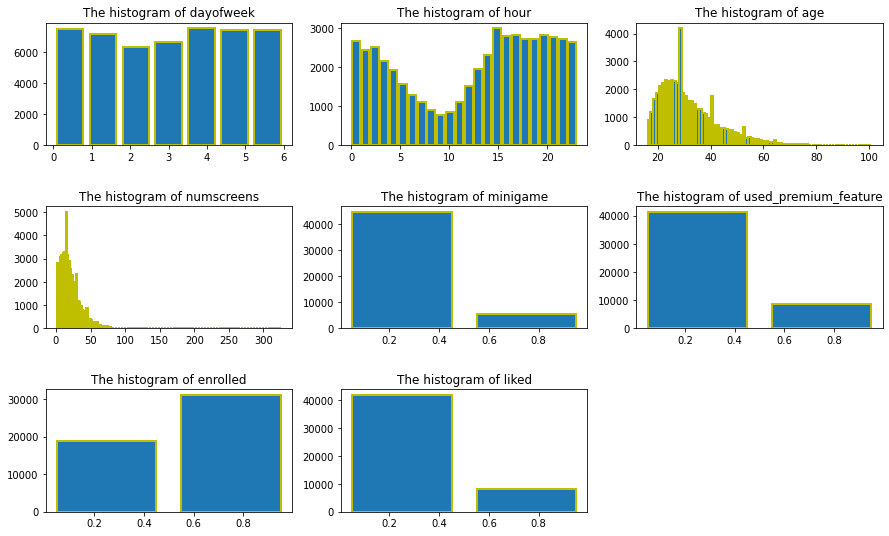

In [17]:
 plt.figure(figsize=(15,9))
 feature = df2.columns
 for i , j in enumerate(feature):
   plt.subplot(3,3,i+1)
   plt.title("The histogram of {}".format(j))
   bins = len(df2[j].unique())
   plt.hist(df2[j], bins= bins, rwidth = 0.8, edgecolor="y", linewidth=2)
plt.subplots_adjust(hspace=0.5)

Here, minigame, used_preminum_feature, enrolled, liked are binary class. Less people enrolled in tuesday and wednesday and around 10 hours. Most of the enrolled people are younger. Few customer saw more than 40 screen.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


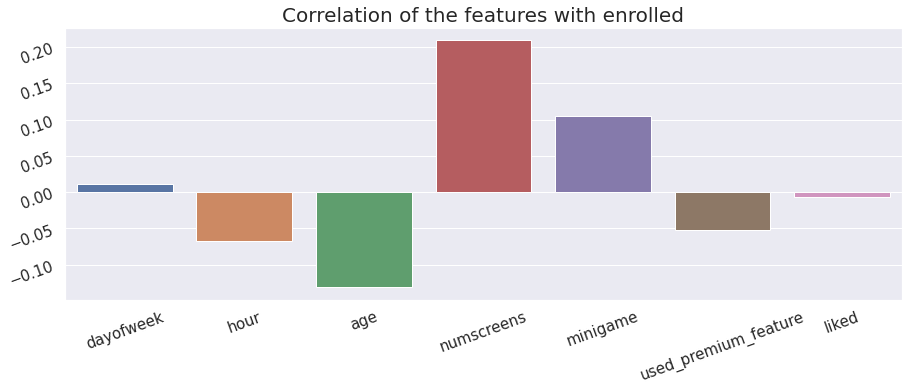

In [18]:
x = df2.drop(["enrolled"],axis=1)
y= df2["enrolled"]
sns.set()
plt.figure(figsize=(15,5))
plt.title("Correlation of the features with enrolled", fontsize=20)
ax = sns.barplot(x.columns, x.corrwith(y))
ax.tick_params(labelsize=15, labelrotation=20)

In [19]:
df["enrolled_date"].unique()

array([nan, '2013-07-05 16:11:49.513', '2013-02-26 18:56:37.841', ...,
       '2013-02-25 19:36:56.082', '2013-05-09 13:47:52.875',
       '2013-04-28 12:35:38.709'], dtype=object)

In [20]:
df["first_open"] = [parser.parse(i) for i in df["first_open"]]

In [21]:
df["enrolled_date"] = [parser.parse(i) if isinstance(i,str) else i for i in df["enrolled_date"]]

In [22]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [23]:
df["time_to_enrolled"] = (df["enrolled_date"] - df["first_open"]).astype("timedelta64[h]")

In [24]:
df["time_to_enrolled"] 

0        NaN
1        NaN
2        NaN
3        0.0
4        0.0
        ... 
49995    0.0
49996    NaN
49997    NaN
49998    0.0
49999    NaN
Name: time_to_enrolled, Length: 50000, dtype: float64

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

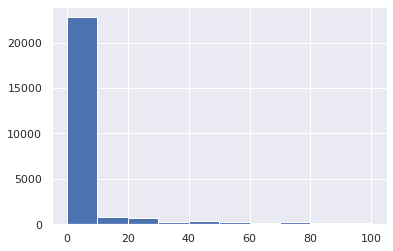

In [25]:
plt.hist(df["time_to_enrolled"].dropna(), range=(0,100))

Most of the customer enrolled the premium version of this app in 10 hours after first open.

We consider those customer who enrolled between 0 to 48 hours and convert zero who enrolled after 48 hours.

In [26]:
df.loc[df.time_to_enrolled>48, 'enrolled'] =0

In [27]:
 df = df.drop(["time_to_enrolled","first_open","enrolled_date"], axis=1)

In [28]:
df.shape

(50000, 10)

In [29]:
df.head(5)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [30]:
screen_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/App behaviorl analysis/top_screens.csv")

In [31]:
screen_data = screen_data.drop(["Unnamed: 0"], axis=1)

In [32]:
 screen_data.head()

,top_screens
0,Loan2
1,location
2,Institutions
3,Credit3Container
4,VerifyPhone


In [33]:
screen_data = screen_data.to_numpy()

In [34]:
screen_data = screen_data.flatten()

In [35]:
screen_data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)


Screen_list has string values but we can not use these directly. To solve this problem we append the string name from ScrenData csv as columns to the main data frame df2 as their name and their values will be 0 and 1.

In [36]:
df["screen_list"] = df["screen_list"].astype(str)+','

In [37]:
for screen_name in screen_data:
  df[screen_name] = df.screen_list.str.contains(screen_name).astype(int)
  df["screen_list"] = df.screen_list.str.replace(screen_name +",","")

In [38]:
df["remaim_list"] = df.screen_list.str.count(",")

In [39]:
df = df.drop(["screen_list"], axis=1)

In [40]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [41]:
saving_screen =  ['Saving9', 'Saving1','Saving8','Saving10', 'Saving4','Saving7','Saving2', 'Saving6', 'Saving2Amount', 'Saving5']
df["saving_screen"] = df[saving_screen].sum(axis=1)
df.drop(columns=saving_screen , axis=1 , inplace=True)

In [42]:
loan_screen = ["Loan2","Loan3","Loan","Loan4"]
df["loan_screen"] = df[loan_screen].sum(axis=1)
df.drop(columns= loan_screen, axis=1, inplace=True)

In [43]:
credit_screen = ['Credit3Container','Credit3Dashboard','Credit3', 'Credit1','Credit2' ]
df["credit_screen"] = df[credit_screen].sum(axis=1)
df.drop(columns=credit_screen, axis=1,inplace=True)

In [44]:
CC1_screen =   ['CC1Category','CC1','CC3',]
df["cc1_screen"] = df[CC1_screen].sum(axis=1)
df.drop(columns=CC1_screen , axis=1, inplace=True)

In [45]:
 df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remaim_list,saving_screen,loan_screen,credit_screen,cc1_screen
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,1,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,1,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,1,3,0
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,0,2,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


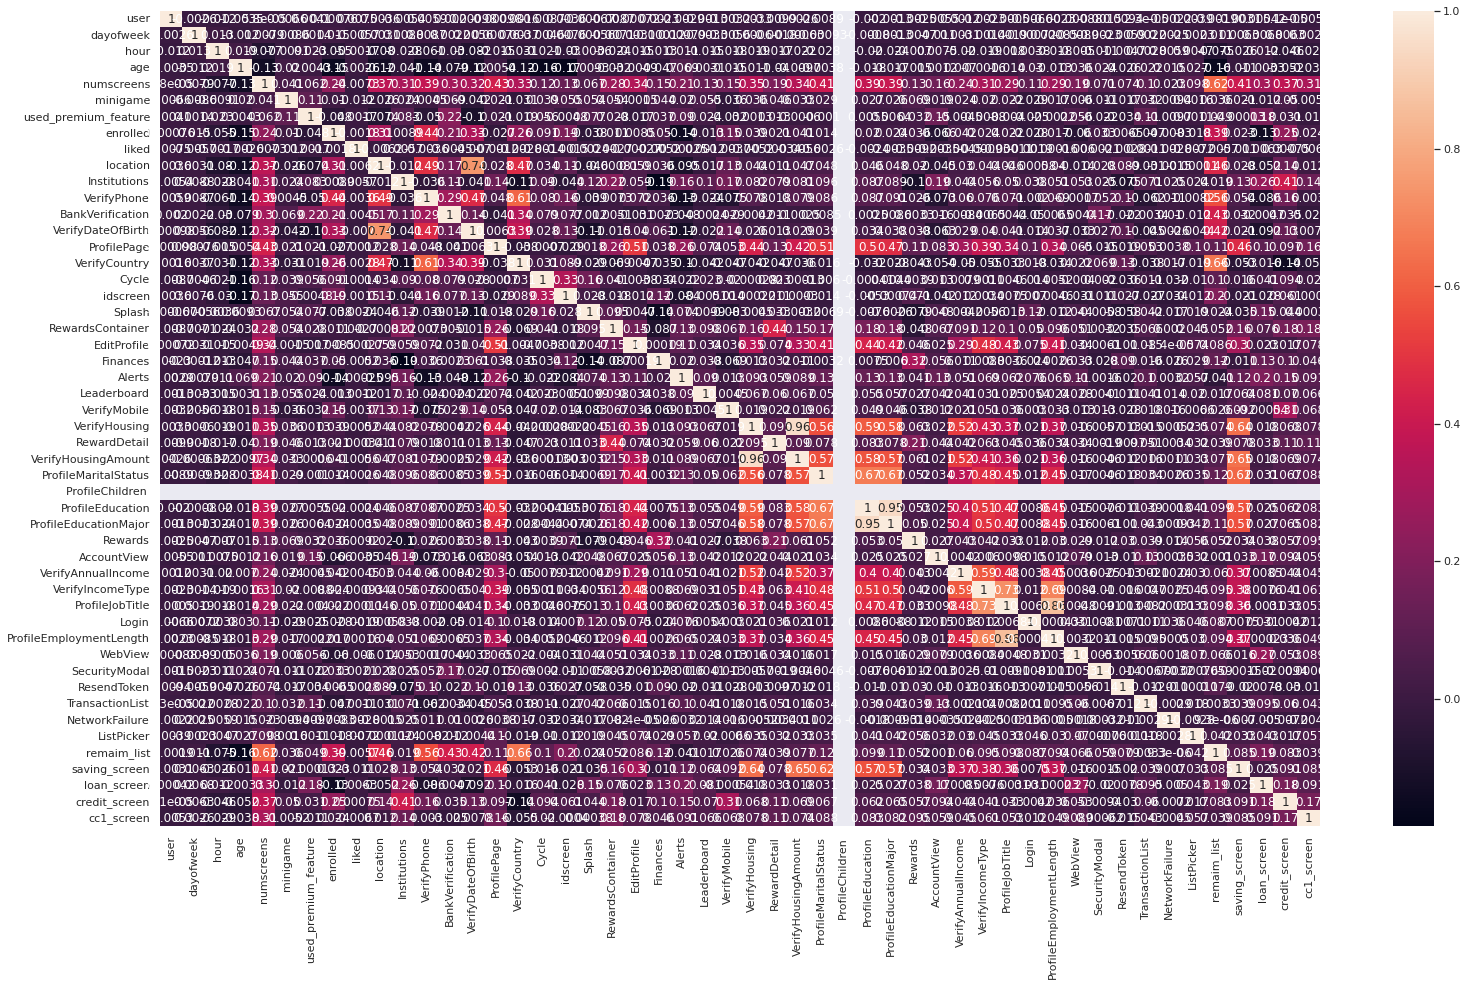

In [46]:
plt.figure(figsize=(26,15))
sns.heatmap(df.corr(), annot=True)

Features are comparatively co-related with each others than previous heatmap.

Now we will apply machine learning classification algorithmns after spliting the data as train and test portion. 

In [47]:
x = df.drop(["enrolled"], axis=1)
y= df["enrolled"]

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3, random_state=22)


In [49]:
print("xtrain shape",xtrain.shape)
print("ytrain shape", ytrain.shape)
print("xtest shape",xtest.shape)
print("ytest shape", ytest.shape)

xtrain shape (35000, 49)
ytrain shape (35000,)
xtest shape (15000, 49)
ytest shape (15000,)


## Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
xtrain_sc = st.fit_transform(xtrain)
xtest_sc = st.fit_transform(xtest)

In [51]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

## Desicion Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
y_predict = dt.predict(xtest)
accuracy_score(ytest, y_predict)

0.6926

In [53]:
dt_sc = DecisionTreeClassifier()
dt_sc.fit(xtrain_sc, ytrain)
y_test_Sc = dt_sc.predict(xtest_sc)
accuracy_score(ytest,y_test_Sc)

0.6936

## Random Forest

In [54]:
 from sklearn.ensemble import RandomForestClassifier
 rf = RandomForestClassifier()
 rf.fit(xtrain,ytrain)
 y_pred_rf = rf.predict(xtest)
 accuracy_score(ytest , y_pred_rf)

0.7779333333333334

In [55]:
rf_sc = RandomForestClassifier()
rf_sc.fit(xtrain_sc, ytrain)
y_test_rf_Sc = rf_sc.predict(xtest_sc)
accuracy_score(ytest,y_test_rf_Sc)

0.7764666666666666

## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)
accuracy_score(ytest, y_pred)

0.6433333333333333

In [57]:
lr_sc = LogisticRegression()
lr_sc.fit(xtrain_sc, ytrain)
y_test_lr_Sc = lr_sc.predict(xtest_sc)
accuracy_score(ytest,y_test_lr_Sc)

0.7630666666666667

## Support Vector Classifier

In [58]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(xtrain,ytrain)
sv_pred =  sv.predict(xtest)
accuracy_score(ytest,sv_pred)

0.506

In [59]:
sv_sc = LogisticRegression()
sv_sc.fit(xtrain_sc, ytrain)
y_test_sv_Sc = sv_sc.predict(xtest_sc)
accuracy_score(ytest,y_test_sv_Sc)

0.7630666666666667

## XGBoost Classifier

In [60]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(xtrain,ytrain)
y_xg_pred = xg.predict(xtest)
accuracy_score(ytest,y_xg_pred)

0.7722

In [61]:
from xgboost import XGBClassifier
xg_sc = XGBClassifier()
xg_sc.fit(xtrain_sc, ytrain)
xg_sc_pred = xg_sc.predict(xtest_sc)
accuracy_score(ytest,xg_sc_pred)

0.7722

**NOW**, Tuning Randomforest classifier and xgbclassifier and compare the result and select one algorithm to predict the customer who buy the app of the premium version and who are not.

# Random forest Classifier

In [62]:
n_estimators = [int(x) for x in np.linspace(50,200,15)]
max_depth = [int(x) for x in np.linspace(2,50)]
min_samples_split = [int(x) for x in np.linspace(2,50)]
min_samples_leaf = [int(x) for x in np.linspace(2,50)]
max_features = ["sqrt", "log2"]
criterion = ["gini", "entropy", "log_loss"]
random_state = [22]

params = {
    "n_estimators" : n_estimators,
    "max_depth": max_depth,
    "min_samples_split" : min_samples_split,
    "min_samples_leaf" : min_samples_leaf,
    "max_features" : max_features,
    "criterion" : criterion,
    "random_state" :random_state

}

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
rr_cv = RandomizedSearchCV(estimator= rf , param_distributions = params , n_iter= 10, n_jobs=10, cv=5)

In [65]:
rr_cv.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=10,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
        

In [66]:
rr_cv.best_estimator_

RandomForestClassifier(max_depth=42, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=24, n_estimators=135, random_state=22)

In [67]:
rr_cv.best_score_

0.7841142857142857

In [68]:
rr_cv.score(xtest,ytest)

0.7782

In [69]:
ypred = rr_cv.predict(xtest)

## Confusuoin Matrix of Random Forest Classifier

In [70]:
cm = confusion_matrix(ytest, ypred)

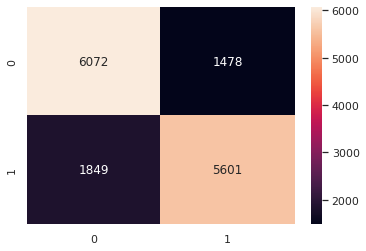

In [71]:
sns.heatmap(cm, annot=True, fmt='g')

## XGBClassifier

In [72]:
import random
colsample_bylevel = [random.random() for i in range(10)]
colsample_bytree = [random.random() for i in range(10)]
gamma =[0]
learning_rate = [random.random() for i in range(10)]
max_delta_step = [2,3,4,5,6,7,8,9]
max_depth = [2,3,4,5,6,7,8,9]
min_child_weights = [2,3,4,5,6,7,8,9]
n_estimators = [int(x) for x in np.linspace(10,100,15)]
n_jobs = [2,3,4,5,6,7,8,9]
subsample = [random.random() for i in range(10)]
min_child_weights = [2,3,4,5,6,7,8,9]

params = {
    "colsample_bylevel":colsample_bylevel,
    "colsample_bytree":colsample_bytree,
    "gamma":gamma,
    "learning_rate":learning_rate,
    "max_delta_step":max_delta_step,
    "max_depth" :max_depth,
    "min_child_weights":min_child_weights,
    "n_estimators":n_estimators,
    "n_jobs":n_jobs,
    "subsample":subsample,
    "min_child_weights":min_child_weights

}

In [73]:
rs_grid = RandomizedSearchCV(estimator=xg, param_distributions=params, n_iter=10,cv=5)

In [74]:
rs_grid.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'colsample_bylevel': [0.7830417852927296,
                                                              0.7549659460981543,
                                                              0.8282846218708355,
                                                              0.4195782559513197,
                                                              0.08821777864302094,
                                                              0.4511005092662068,
                                                              0.3960573031480299,
                                                              0.09557056742698788,
                                                              0.6086226951182305,
                                                              0.9984642335497402],
                                        'colsample_bytree': [0.8489442107485342,
                                            

In [75]:
rs_grid.best_score_

0.7801714285714286

In [76]:
y_pred = rs_grid.predict(xtest)

In [77]:
accuracy_score(ytest,y_pred)

0.7712

## Confususion Matrix XGB classifier

In [78]:
cm2 = confusion_matrix(ytest,y_pred)

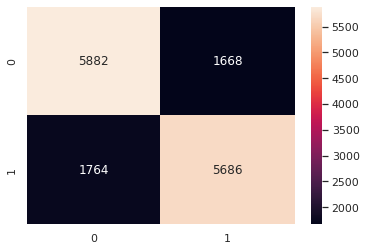

In [79]:
sns.heatmap(cm2, annot=True , fmt='g')

Here, type-1 error is less than type-2 error. But  Random forest  is the best algorithm for predicting customer who buy premium version app and who are not.Because RF has the high accuracy 77.82% with low type-1 error. 

## Classification Report of Random Forest 

In [80]:
cls_report = classification_report(ytest, ypred)
print("Classification report of ML Random forest \n {}".format(cls_report))

Classification report of ML Random forest 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78      7550
           1       0.79      0.75      0.77      7450

    accuracy                           0.78     15000
   macro avg       0.78      0.78      0.78     15000
weighted avg       0.78      0.78      0.78     15000



In [81]:
 y_pred = rr_cv.predict(x)

In [82]:
y_pred = pd.DataFrame(y_pred)

In [83]:
final_result = pd.concat([df.user, df.enrolled], axis=1)

In [84]:
final_result["predicted_result"] =  y_pred

In [85]:
 final_result

,user,enrolled,predicted_result
0,235136,0,1
1,333588,0,0
2,254414,0,0
3,234192,1,1
4,51549,1,1
...,...,...,...
49995,222774,1,1
49996,169179,0,0
49997,302367,0,0
49998,324905,1,1


We have completed the Machine learning Project successfully with 77.82% accuracy which is great for ‘Directing Customers to Subscription Through Financial App Behavior Analysis’ project. Now, we are ready to deploy our ML model in the Fin_tech company project.